<h3>Assignment:</h3>
<ol>
<li>Change the code 8 or your own 4th Code from Assignment 4 to include:
<ol>
<li>image normalization</li>
<li>L2 regularization</li>
<li>ReLU after BN</li>
</ol>
</li>
<li>Run your new code for 40 epochs and save the model with highest validation accuracy</li>
<li>Find out 25 misclassified images from the validation dataset and create an image gallery</li>
<li>Submit</li>
</ol>


Reference :
1. https://github.com/amitdoda1983?tab=repositories
2. https://github.com/faizanahemad/data-science-utils/blob/master/data_science_utils/vision/keras/SampleAPIUsage.ipynb

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras import regularizers

from keras.datasets import mnist

import keras.callbacks
from keras.callbacks import *

Using TensorFlow backend.


In [0]:
  (X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


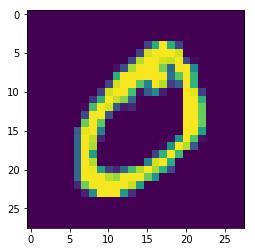

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
# Mean and Standard Deviation of Train Images
print(X_train.mean(),X_train.std())

33.318421449829934 78.56748998339798


In [0]:
# Mean and Standard Deviation of Test Images
print (X_test.mean(),X_test.std())

33.791224489795916 79.17246322228644


In [0]:
train_X= X_train
test_X = X_test

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

##Model with Image Normalization

In [0]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
(64, 28, 28, 1) -0.009762686 0.99055666
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [0]:
# demonstrate effect on entire test dataset
iterator = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
# get a batch
batch_testX, batch_testy = iterator.next()

In [0]:
batch_testX.shape

(10000, 28, 28, 1)

In [0]:
# Mean and Standard Deviation of Test Images after Image Normalization
print (batch_testX.mean(),batch_testX.std())

0.0060174568 1.0077008


Reshape the input to have the dimension for channel

In [0]:
X_train = batchX
X_test = batch_testX

In [0]:
y_train = batchy
y_test = batch_testy

In [0]:
# One - hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#With Image Normalization, RELU after BN annd L2 Regularizer

In [0]:

model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.0000001))) 
# Global Receptive field (3,3), output channel size =(26,26,10)

model.add(Convolution2D(16, (3, 3),kernel_regularizer=regularizers.l2(0.0000001)))
# Global Receptive field (5,5), output channel size =(24,24,16)

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2)))
# Global Receptive field (10,10), output channel size =(12,12,16)

model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.0000001))) 
# Global Receptive field (12,12), output channel size =(10,10,16)
  
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size = (2, 2)))
# Global Receptive field (24,24), output channel size =(5,5,16)


  
model.add(Convolution2D(32, (3,3),activation='relu',kernel_regularizer=regularizers.l2(0.0000001)))  
# Global Receptive field (26,26), output channel size =(3,3,32)


model.add(Convolution2D(10,1, kernel_regularizer=regularizers.l2(0.0000001))) 
# Global Receptive field (26,26), output channel size =(3,3,10)

model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(AveragePooling2D(pool_size = (3, 3)))
# Global Receptive field (28,28), output channel size =(1,1,10)


model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 16)        2320      
__________

In [0]:
checkpointer = ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', mode='auto', verbose = 1, save_best_only=True)
lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=0.5, cooldown=0, patience=4, min_lr=0.5e-9,verbose = 1)

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1,validation_data=(X_test, Y_test),callbacks=[checkpointer,lr_reducer])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 14s 225us/step - loss: 1.3918 - acc: 0.7430 - val_loss: 1.1735 - val_acc: 0.7500

Epoch 00001: val_acc improved from -inf to 0.75000, saving model to best_model.h5
Epoch 2/40
60000/60000 [==============================] - 12s 195us/step - loss: 0.6098 - acc: 0.9229 - val_loss: 0.8776 - val_acc: 0.7935

Epoch 00002: val_acc improved from 0.75000 to 0.79350, saving model to best_model.h5
Epoch 3/40
60000/60000 [==============================] - 12s 195us/step - loss: 0.3709 - acc: 0.9488 - val_loss: 0.5368 - val_acc: 0.9217

Epoch 00003: val_acc improved from 0.79350 to 0.92170, saving model to best_model.h5
Epoch 4/40
60000/60000 [==============================] - 12s 194us/step - loss: 0.2731 - acc: 0.9591 - val_loss: 0.3730 - val_acc: 0.9533

Epoch 00004: val_acc improved from 0.92170 to 0.95330, saving model to best_model.h5
Epoch 5/40
60000/60000 [=============================

In [0]:
# Loading a saved model
model=keras.models.load_model('best_model.h5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.15905679914951323, 0.9743]


In [0]:
# calculate predictions
# used to compute category outputs
predict=model.predict_classes(X_test)

#Showing 25 Misclassified Images 

In [0]:
misclassified = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
misclassified=misclassified[0].tolist()

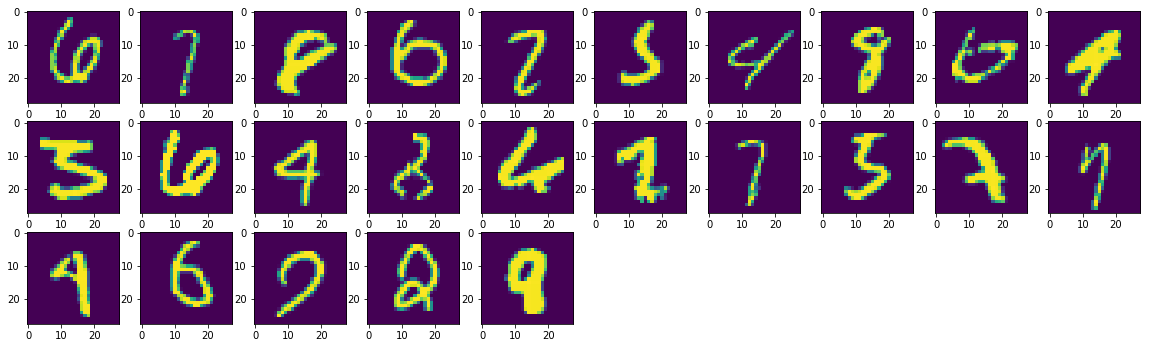

In [0]:
fig=plt.figure(figsize=(20,20))
n=0
for j in (misclassified):
  if n <25:
    fig.add_subplot(10,10,n+1) # 10,10 is rows, columns
    plt.imshow(test_X[j])
    n+=1
plt.show()